<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_12_26(409_451).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##07 군집화

###01 K - 평균 알고리즘 이해

군집 중심점이라는 특정 임의 지점을 선택해 가장 가까운 포인트를 선택하는 군집화 기법으로, 군집 중심점은 선택 포인트의 평균지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복 수행하는 것

- 모든 데이터 포인트에서 더이상 중심점의 이동이 없ㅇ르 경우 반복을 멈추고 해당 중심점에 속하는 데이터 포인트를 군집화하는 기법

>1 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 두는데, 전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치에 가져다 두는 것으로 랜덤으로 두기보다는 초기화 알고리즘을 통해 적합한 위치에 중심점을 가져다 두어야 함

>2각 데이터는 가장 가까운 곳에 위치한 중심점에 소속되며 소속이 결정된 후 군집 중심점을 다시 데이터들의 평균 중심으로 이동시킴

>3 중심점의 이동으로 다시 기존 데이터들의 중심점 할당

>4 다시 중심점 이동, 그 후 소속변경이 없으면 종료, 있다면 위의 과정 반복

- K평균의 장점: 일반적인 군집화에서 가장 많이 활용되며 알고리즘이 쉽고 간단함

-K평균의 단점: 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어지며 반복횟수가 많을 경우 수행 시간이 느려지고, 군집 개수 설정에 가이드라인이 부재

#### 사이킷런 KMeans 클래스 소개

- 주요 파라미터: n_clusters - 군집화 개수(군집 중심점의 개수), init - 초기 군집 중심점의 좌표 설정 방식, max_iter - 최대 반복 횟수

- fit, fit_transform을 이용하여 수행하며, labels_라는 중심점 레이블, cluster_centers_라는 군집중심점 좌표의 속성을 확인할 수 있음

#### K-평균을 이용한 붓꽃 데이터 세트 군집화

기존의 분류와 군집화를 비교해보자! 

In [35]:

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [36]:
#clustering with 3 groups
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)
    

KMeans(n_clusters=3, random_state=0)

In [37]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [38]:
# each dataset clusters in 3 groups
# classification
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)


target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- target 1에에 대해서는는 0에에 치중하여여, target 2에에 대해서는는 분산되어어 그루핑핑

- 붓꽃꽃 데이터의의 군집화화 시각화

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


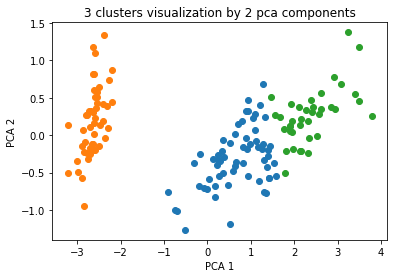

In [40]:
#군집값이이 0,1,2인인 경우마다다 별도의의 인덱스로로 추출출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집값값 0,1,2에에 해당하는는 인덱스로로 각각 군집집 레벨의의 pca_x, pca_yr값값 추출출, o,s,^로로 마커표시시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='o')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 pca components')
plt.show()

#cluster 0,1 is not to be classified clearly

#### 군집화 알고리즘 테스트를 위한 데이터 생성

- 대표적인 군집화용 데이터 생성기로는 make_blobs()와 make_classification()이 있는데 하나의 클래스에 여러 군집이 분포될 수 있도록 데이터를 생성할 수 있으며 전자는 개별 군집의 중심점과 표준편차 제어기능이 추가되어 있고, 후자는 노이즈를 포함한 데이터를 만드는 데 유용학 ㅔ사용할 수 있으며, 그 외에도 make_circle(), make_moon()은 중심기반 군집화로 해결하기 어려운 데이터세트를 만드는 데 사용됨

- n_samples(생성할 총 데이터 개수, 디폴트는 100개), n_features(데이터의 피처개수, 시각화를 목표로 할 경우 2개로 설정해 첫번째는 x, 두번째는 y로 좌표상에 표현),  center(int값이면 군집개수, Ndarray로 표현시개별 군집 중심점의 좌표), cluster_std(생성될 군집 데이터의 표준펴나로 군집별로 서로 다른 표준편차를 가진 데이터세트를 제작할 때 만듦

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features = 2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값값 분포포 확인인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [42]:
import pandas as pd
# changing to DataFrame
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


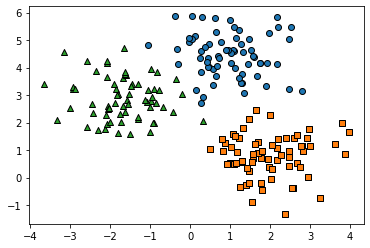

In [46]:
#Let's see what clusters distribution it has
target_list = np.unique(y)
# each target has marker
markers = ['o', 's', '^','P','D','H','x']
#3 clusters > target_list [0.1.2]
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
  marker = markers[target])
plt.show()


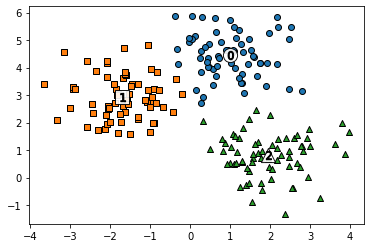

In [49]:
#K clusters and visualization for each clusters
#KMEans 객체이용용, X 데이터를를 Kmeans 클러스터링링 수행행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_는는 개별별 클러스터의의 중심위치치 좌표표 시각화를를 위해해 추출출
centers = kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers = ['o', 's', '^','P','D','H','x']

#군집된된 label dㅠ형별로로 iteration하면서서 marker별로로 scatter plot 수행행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
              marker = markers[label])
  # 군집별별 중심위치치 좌표표 시각화화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker='$%d$' % label)
plt.show()


In [50]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
#cluster std가가 작을수록록 군집집 중심에에 데이터가가 모여있고고, mㄹ수록록 퍼져있음

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### 03 군집 평가

- 타깃레이블이 있는 경우 가능하나 데이터내의 숨어있는 별도의 그룹을 찾아 의미를 부여하거나 동일한 분류값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 갖고 있음

- 따라서 군집화 성능 검증에서는 실루엣 분석 사용

#### 실루엣 분석의 개요

- 각 군집간 거리가 얼마나 효율적으로 분리돼있는지로, 다른 군집과의 거리는 떨어져있으며 동일 군집과의 거리는 가깝게 잘 뭉쳐있다는 것으로 개별 데이터가 갖는 실루엣계수를 바탕으로 진행

- 해당 데이터포인트와 같은 군집내의 다른 데이터 포인트와의 거리 평균값, 속하지 않은 군집 중 가장 가까운 군집과의 평균거리를 기반으로 평균값과 평균거리의 차를 정규호하여 정의

- sklearn.metrics.silhouettet_samples(X, labels, metric=‘eucidean’)인자로 X features 데이터세트와 각 피처 데이터세트가 속한 군집 레이블값인 labels 데이터를 입력해주면 각 데이터포인트의 실루엣 계수를 계산해 반환

- sklearn.metrics.silhouettet_score(X,labels, metric=‘eucidean’, sample_size = none) 인자로 xfeature 데이터세트와 각 피처 데이터세트가 속한 군집 레이블값인 labelㄷ ㅔ이터를 입력해주면 전체 데이터의 실루엣 곗 ㅜ값을 평균해 반환하며 이 값이 높을 수록 군집화가 잘 되었다 판단할 수 있음

- 좋은 군집화란 전체 실루엣계수의 평균값이 1에 가까울 수록 좋으며, 0-1사이이고, 개별 군집의 평균값ㅢ 편차가 크지 않아야 함

#### 붓꽃 데이터세트를 이용한 군집 평가

In [51]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣엣 분석석 평가가 지표값을 구하기기 위한한 API 추가

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_DF = pd.DataFrame(data=iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의의 모든든 개별데이터의의 실루엣엣 계수수
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의의 shape ', score_samples.shape)

#irisDF에에 실루엣계수수 칼럼럼 추가가
irisDF['silhouette_coeff']=score_samples

#모든든 데이터의의 평균균 실루엣계수수 값값
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('iris data set silhouette analysis score: {0:.3f}'.format(average_score))
irisDF.head(3)


silhouette_samples() return 값의의 shape  (150,)
iris data set silhouette analysis score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,0.829315


In [52]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()


cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette_coeff, dtype: float64

#### 군집별 평균 실루엣 계수의 시각화를 통한 군집개수 최적화 방법

- 특정 군집내의 실루엣계수만 높고 타 군집은 실루엣계수가 낮아도 평균적으로는 좋은 갓ㅂ을 가질 수 있으므로 이러한 방법을 시각적으로 지원해주는 군집개수를최적화하는 방법

- 주어진 데이터에 대해 군집 개수를 2개로 정했을 경우 평균 실루엣 계수는 높게 나타나도 2개의 군집이 최적이라 보기는 어려움. 2번 군집에서 평균보다 매우 낮은 데이터값이 다수 존재하기 때문

- 군집개수를 3개로 둘 경우 각 군집의 평균은 높을지라도 전체 평균이 덜어졌으며, 특정 한 군집에서 평균보다 낮은 실루엣 계수를 갖는 것을 확인할 수 있음

- 군집이 4개인 경우 전체평균은 3개보다 올라갔으며 비교적 균일한 군집별 평균을 갖는 것을 통해 이상적인 군집화 개수라 할 수 있음

- 소스코드 중 일부를 수록하여 진행하며, visualize silhouettet은 내부 파라미터로 여러개의 군집 개수를 리스트로 가지는 첫번째 파라미터와 두번째 파라미터를 갖고있음


In [55]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [57]:
#visualize_silhouette([2,3,4,5], X_features)

NameError: ignored

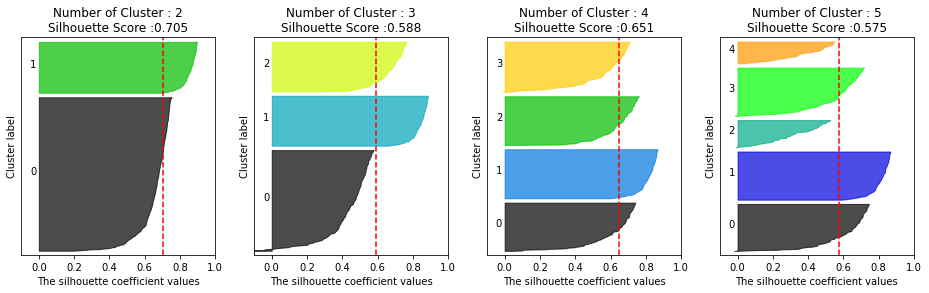

In [58]:
#make blobs를를 통해해 군집화를를 위한한 4개의의 군집집 중심의의 500개개 2차원원 데이터세트트 생성성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, n_features =2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)
#군집집 개수가가 2,3,4,5개일일 때때 군집별별 실루엣계수수 평균랎을을 시각화화
visualize_silhouette([2,3,4,5],X)



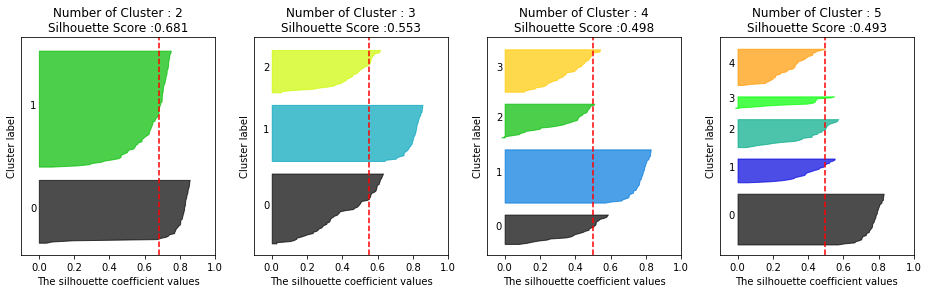

In [59]:
#with iris data, k means > best clusters
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

best clusters num == maybe 2

### 03 평균 이동
#### 평균 이동의 개요

- k means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행하나, 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시키는 방식

- 평균ㅇ ㅣ동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾으며 군집중심점은 확률밀도 함수를 이용하여 집중적으로 데이터가 모여잇는 피크인 점을 군집 중심점으로 삼아 설정하고, 이를 위해 KDE를 사용

- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리값을 KDE 함수값으로 입력한 뒤 그 반환값을 현재 위치에서 업데이트하면서 이동하는 방식을 취하고, 이 방식을 전 ㅔ데이터에 반복적으로 적용

- 커널 함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 대표적인 방법으로 관측된 데이터 각각에 커널함수를 적용한값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정하는 것. 

- KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨


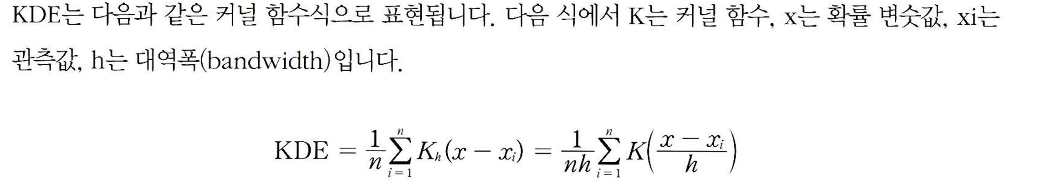

- 대역폭 h는 kde형태를 부드러운 형태로 평활화 하는데 적용되며, 이를 어떻게 설정하느냐에 따라 성능이 크게 좌우. 작은 값은 과적합이 쉬우며 큰 값은 과도한 평활화로 과소적합되기 쉬움

- 평균 이동 군집화는 대역폭이 클수록 적은 수의 군집 중심점을, 적을수로 많은 군집 중심점을 가지며, 군집 개수를 직접 지정하지 않고 대역폭에 의해서만 지정하여 군집화를 수행함



In [61]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std = 0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

#지나친 세분화된 군집화
#bandwidth를 높여 수행

cluster labels 유형:  [0 1 2 3 4 5]


In [62]:
meanshift = MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

#3개의 군집으로 잘 마무리

cluster labels 유형:  [0 1 2]


In [63]:
#최적의 군집화를 위한 bandwidth찾기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값: ', round(bandwidth,3))


bandwidth 값:  1.816


In [64]:
#동일 makeblobs세트에 군집화 수행
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

#estimate bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('clsuter labels 유형: ', np.unique(cluster_labels))

clsuter labels 유형:  [0 1 2]


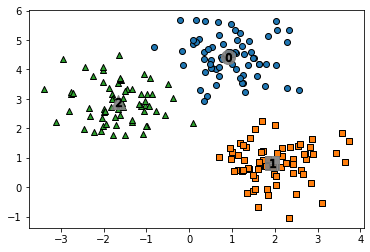

In [69]:
#3개의 군집으로 된 것들의 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  #군집별 다른 마카로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker =markers[label])

  #군집별 중심표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [70]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())


target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 데이터 세트 형태에 대해 가정이 없기 떄문에 유연한 군집화가 가능하나 bandwidth의 크기에 따라 군집화 영향도가 크며 수행시간이 길다는 단점이 존재

###04 GMM(Gaussian Mixture Model)
#### GMM 소개

- 군집화를 적용하고자 하는 데이터가 여러개의 가우시안 분포를 가진 데이터 집합들이 섞여 생성된것이라는 가정하에 군집화를 수행하는 방식

- 가우시안 분포? : 좌우 대칭형의 종 형태를 가진 정규분포로 평균 뮤를 중심으로 높은 데이터분포도를 갖고 있으며 좌우 표준편차 1에 전체 데이터의 68.27, 좌우 표준편차 2에 전체 데이터의 95퍼센트를 갖고 있음

- 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출하는 것으로 서로 다른 정규분포를 가진 여러 확률분포 곡선으로 구성되었다는 가정 하에 군집화를 수행하는 것으로 개별 데이터가 이 중 어느 정규분포에 속하는지 결정하는 방식을 통해 군집화 진행

- 모수 추정이 필요, 개별 정규분포의 평균과 분산, 각 데이터가 어떤 정규분포에 해당하는지에 대한 확률을 추정하는 것을 의미

#### GMM을 이용한 붓꽃 데이터세트 군집화

In [71]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length','petal_with']

#for handling convenintly, change to DataFrame
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] =iris.target


In [73]:
# n_components number == gaussian mixture's model num
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#gmm resulsts > gmm cluster which is irisDF's column
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target  > gmm_cluster 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [76]:
#target0 > cluster0, target2 > cluster1
# target1 > cluster2 45%, cluster1 10%
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kemans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kemans_cluster'].value_counts()
print(iris_result)


target  kemans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kemans_cluster, dtype: int64


### GMM과 K-평균의 비교

- KMeans는 원형의 범위에서 군집화를 수행하여 원형일수록 군집화 효율이 높아짐

- KMeans는 개별 군집의 중심에서 원형의 범위로 데이터를 군집화하는 반면 원형이 아닌 경우 군집화를 잘 수행하지 못함

> make_blobs 의 데이터를 변환하여 KMeans가 군집화를 잘 하지 못하는 데이터를 생성해보기로 함

> visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True)
- clusterobj : 사이킷런의 군집 수행 객체로 kmeans gaussianmixture의 Fit(), prdict로 군집화를 완료한 객체. 군집화 결과 시각화가 아닌  make blobs()데이터의 시각화일 경우 None 
- dataframe: 피처 데이터 세트와 label값을 가진 dataframe
- label_name 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs() 결과 시가화일 경우는 dataframe내의 target 칼럼명
- iscenter: 사이킷런 cluster 객체가 군집 중심 좌표를 제공하면 true, 그렇지 않으면 False

In [85]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()


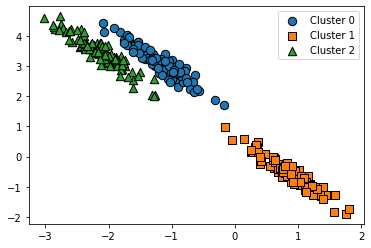

In [86]:
from sklearn.datasets import make_blobs
#make blobs()로로 300개의 데이터세트트, 3개의의 군집세트트, cluster_std = 0.5fmf todtjd
X,y = make_blobs(n_samples=300, n_features = 2, centers =3, cluster_std = 0.5, random_state=0)

#길게게 늘어난난 타원형의의 데이터세트를를 생성하기기 위해해 변환함함
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터세트ma ㅏㅗkeblobs()의의 y결과값을을 데이터프레임으로로 저장장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y
#생성된된 데이터세트를를 target별별 다른른 마커로로 표시해해 시각화화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


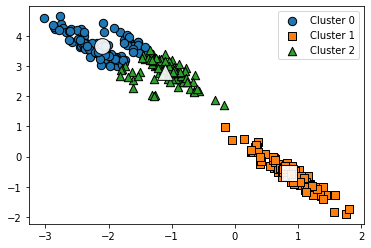

In [89]:
#3개의의 군집기반반 kmeansf > x_aniso 데이터세트에에 적용용
kmeans = KMeans(3, random_state=0)
kmeans_label =kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)


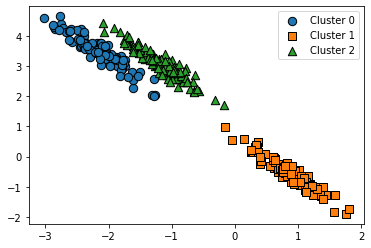

In [90]:
# kmenas > 평균거리기반반 군집화화
# GMM 군집화화
#3개의의 n_componnents 기반 GMM > xaniso
gmm = GaussianMixture(n_components=3, random_state = 0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GaussianMixture 는 cluster centers 속성이이 없으므로로 iscluster를를 False로로 설정정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)


In [91]:
print('### kmeans clustering###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n ### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### kmeans clustering###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

 ### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


### 05 DBSCAN
#### DBSCAN 개요

- 밀도 기반 군집화로 간단하고 직관적인 알고리즘임에 비해 데이터의 분포가 기하학적으로 복잡한 데이터세트에도 효과적인 군집화가 잘 수행되는 군집화 방식

- epilon으로 표현하는 주변 영역은 개별데이터를 중심으로 입실론 반경을 갖는 원형의 영역, 최소 데이터의 개수란 입실론 주변 영역에 포함되는 타 데이터의 개수

-  핵심포인트 : 주변 영역내에 최소데이터 개수이삳의 타 데이터를 갖고 있을 경우 해당 데이터를 일컫는 말

- 이웃 포인트: 주변 영역 내에 위치한 타 데이터

- 경계 포인트: 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 갖고 있지 않지만 핵심포인트를 이웃 포인트로 갖고 있는 데이터

- 잡음 포인트: 최소 데잍 개수 이상의 이웃포인트도 없고 핵심포인트도 읻웃 포인트로 가지고 있지 않는 데이터

1. 12개의 포인트가 있을 때 p1 기준 입실론 반경내의 데이터가 7개이고 최소데이터 5개이상이 반경에 있으므로 p1은 핵심데이터

2. p2는 반경내에 최소데이터 5개이상이 존재하므로 핵심포인트

3. p1과 p2는 둘다 핵심포인트로 직접 접근이 가능

4. 특점 핵심포인트에 서 직접접근이 가능한 다른 핵심포인트를 연결하며 군집화를 구성한느 방식

5. 최소데이터도 반경내에 존재하지 않고 이웃데이터로 핵심포인트로 없는 p12를 잡음 포인트라 함




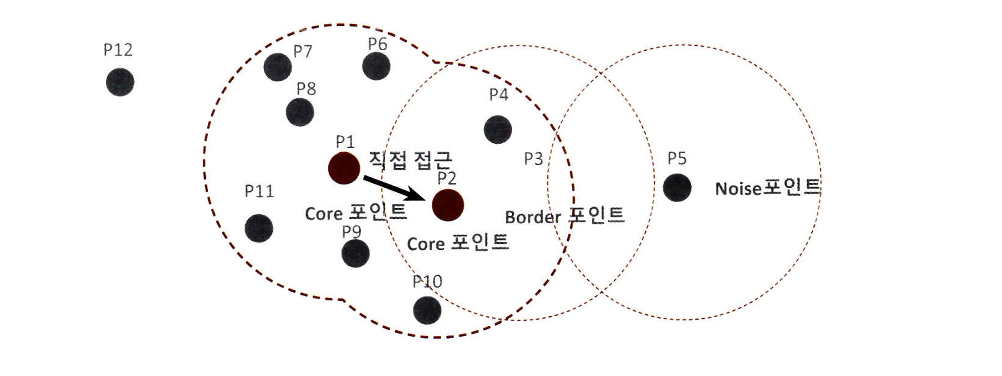

#### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [92]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps =0.6, min_samples =8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- dbscan cluster값이 0,1 이외에도 -1로 존재하는데 이것은 노이즈에 속하는 군집, dbscan에서는 알고리즘에 따라 군집개수를 결정하므로 군집 개수 지정이 무의미함

- dbscan에서 군집화데이터세트를 2차원 평면에서 표현하기 위해 pca를 이용하여 2개 피처로 압축변환한 뒤 앞 예제에서 사용한 visualize 함수를 이용하여 시가고하

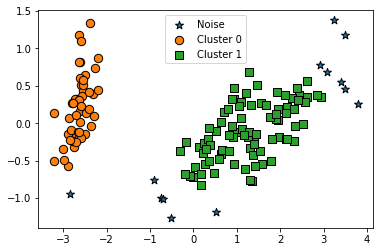

In [93]:
from sklearn.decomposition import PCA
# for 2-d visualization, PCA n_components=2 feature datasets transform
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
#visualize cluster 2d expresses ftr1, ftr2 on location, pca transformation to column
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


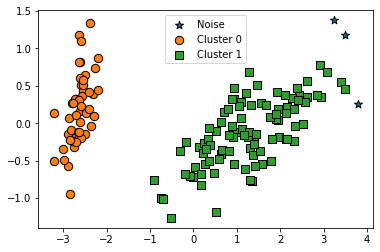

In [97]:
# * means noise
# increasing eps means including more datasets so noise data decreases

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [98]:
#dbscan's parameter changed
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')


#### DBSCAN 적용하기 - make_circles()데이터 세트

: noise means 노이즈 데이터 세트의 비율, factor means scale ratio of extra circle and inner circle

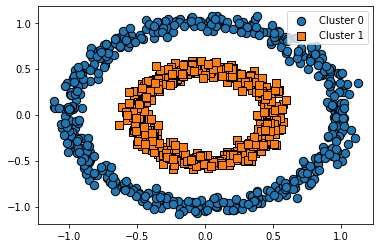

In [99]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF, 'target', iscenter=False)


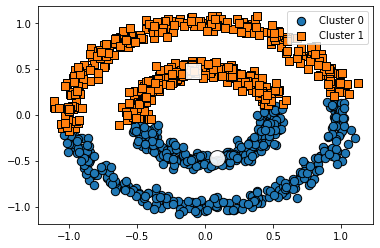

In [101]:
#KMEANS로로 makecircles 데이터터 세트를를 군집화화 수행행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans,clusterDF, 'kmeans_cluster', iscenter=True)


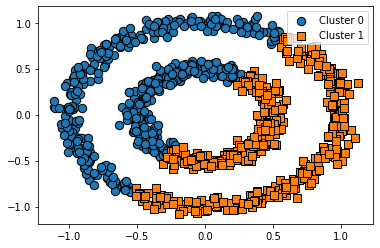

In [104]:
 # apply GMM, make circles datasets clustering
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


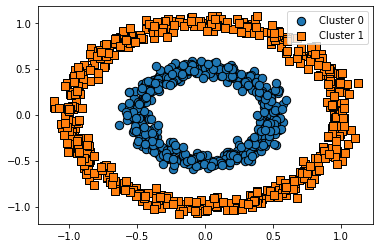

In [105]:
#DBSCAN으로로 makecirclse() 데이터세트트 군집화화 수행행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples = 10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan,clusterDF, 'dbscan_cluster', iscenter=False)
